# **Class 5: PyTorch Introduction**

In [2]:
from IPython.display import Image, display
import numpy as np
import random
import matplotlib.pyplot as plt

project_path = '/Users/tmsantos/Documents/CapstoneProject/CapstoneProject/'

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Part 1 - Delta Rule: Derivative of Binary Cross-Entropy (BCE) and Weight Update

### Binary Cross-Entropy (BCE) Loss Function

The **Binary Cross-Entropy (BCE)** loss function is commonly used for binary classification tasks and measures how well the model’s predicted probabilities align with the actual class labels.

The BCE loss is defined as:

$$
\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
$$

Where:
- $ n $ is the number of data points.
- $ y_i $ is the actual class label (0 or 1).
- $ \hat{y}_i $ is the predicted probability, calculated using the **sigmoid activation function**:

$$
\hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}
$$

And:
- $ z_i = w \cdot x_i + b $
- $ w $ is the weight vector.
- $ x_i $ is the input feature vector.
- $ b $ is the bias term.

### Derivative of BCE with Respect to Weight $ w $

Let's find the derivative of the Binary Cross-Entropy loss function with respect to the weight $ w $.

1. **Substitute** $ \hat{y}_i $ in the BCE formula:

$$
\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \cdot \log\left(\frac{1}{1 + e^{-z_i}}\right) + (1 - y_i) \cdot \log\left(1 - \frac{1}{1 + e^{-z_i}}\right) \right]
$$

2. **Simplify** the expression for $ \hat{y}_i $:

$$
\hat{y}_i = \frac{1}{1 + e^{-z_i}}
$$

The derivative of the BCE loss function with respect to $ \hat{y}_i $ is:

$$
\frac{\partial \text{BCE}}{\partial \hat{y}_i} = -\frac{y_i}{\hat{y}_i} + \frac{1 - y_i}{1 - \hat{y}_i}
$$

3. **Chain rule**: Now, we need the derivative of $ \hat{y}_i $ with respect to the weight $ w $.

Using the derivative of the sigmoid function:

$$
\frac{\partial \hat{y}_i}{\partial z_i} = \hat{y}_i \cdot (1 - \hat{y}_i)
$$

And since $ z_i = w \cdot x_i + b $, we have:

$$
\frac{\partial z_i}{\partial w} = x_i
$$

4. **Combining** the derivatives:

The derivative of BCE with respect to the weight $ w $ is:

$$
\frac{\partial \text{BCE}}{\partial w} = \sum_{i=1}^{n} \frac{\partial \text{BCE}}{\partial \hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial z_i} \cdot \frac{\partial z_i}{\partial w}
$$

Substitute the individual derivatives:

$$
\frac{\partial \text{BCE}}{\partial w} = \sum_{i=1}^{n} \left( -\frac{y_i}{\hat{y}_i} + \frac{1 - y_i}{1 - \hat{y}_i} \right) \cdot \hat{y}_i \cdot (1 - \hat{y}_i) \cdot x_i
$$

Simplifying:

$$
\frac{\partial \text{BCE}}{\partial w} = \sum_{i=1}^{n} ( \hat{y}_i - y_i ) \cdot x_i
$$

### Gradient Descent Update Rule

In gradient descent, the weight $ w $ is updated by subtracting a small fraction (controlled by the learning rate $ \eta $) of the gradient:

$$
w = w - \eta \cdot \frac{\partial \text{BCE}}{\partial w}
$$

Substitute the derivative of BCE with respect to \( w \):

$$
w = w - \eta \cdot \sum_{i=1}^{n} ( \hat{y}_i - y_i ) \cdot x_i
$$

For the **Delta Rule**, we typically consider updating weights for **each individual training example** rather than averaging over the entire dataset. This means the weight update becomes:

$$
w = w - \eta \cdot ( \hat{y}_i - y_i ) \cdot x_i
$$

### Final Weight Update Rule

The weight update rule for each individual training example becomes:

$$
w = w + \eta \cdot (y_i - \hat{y}_i) \cdot x_i
$$

This is the Delta Rule used in the binary classification example, where:

- $ y_i - \hat{y}_i $ is the error.
- $ \eta $ is the learning rate.
- $ x_i $ is the input feature.

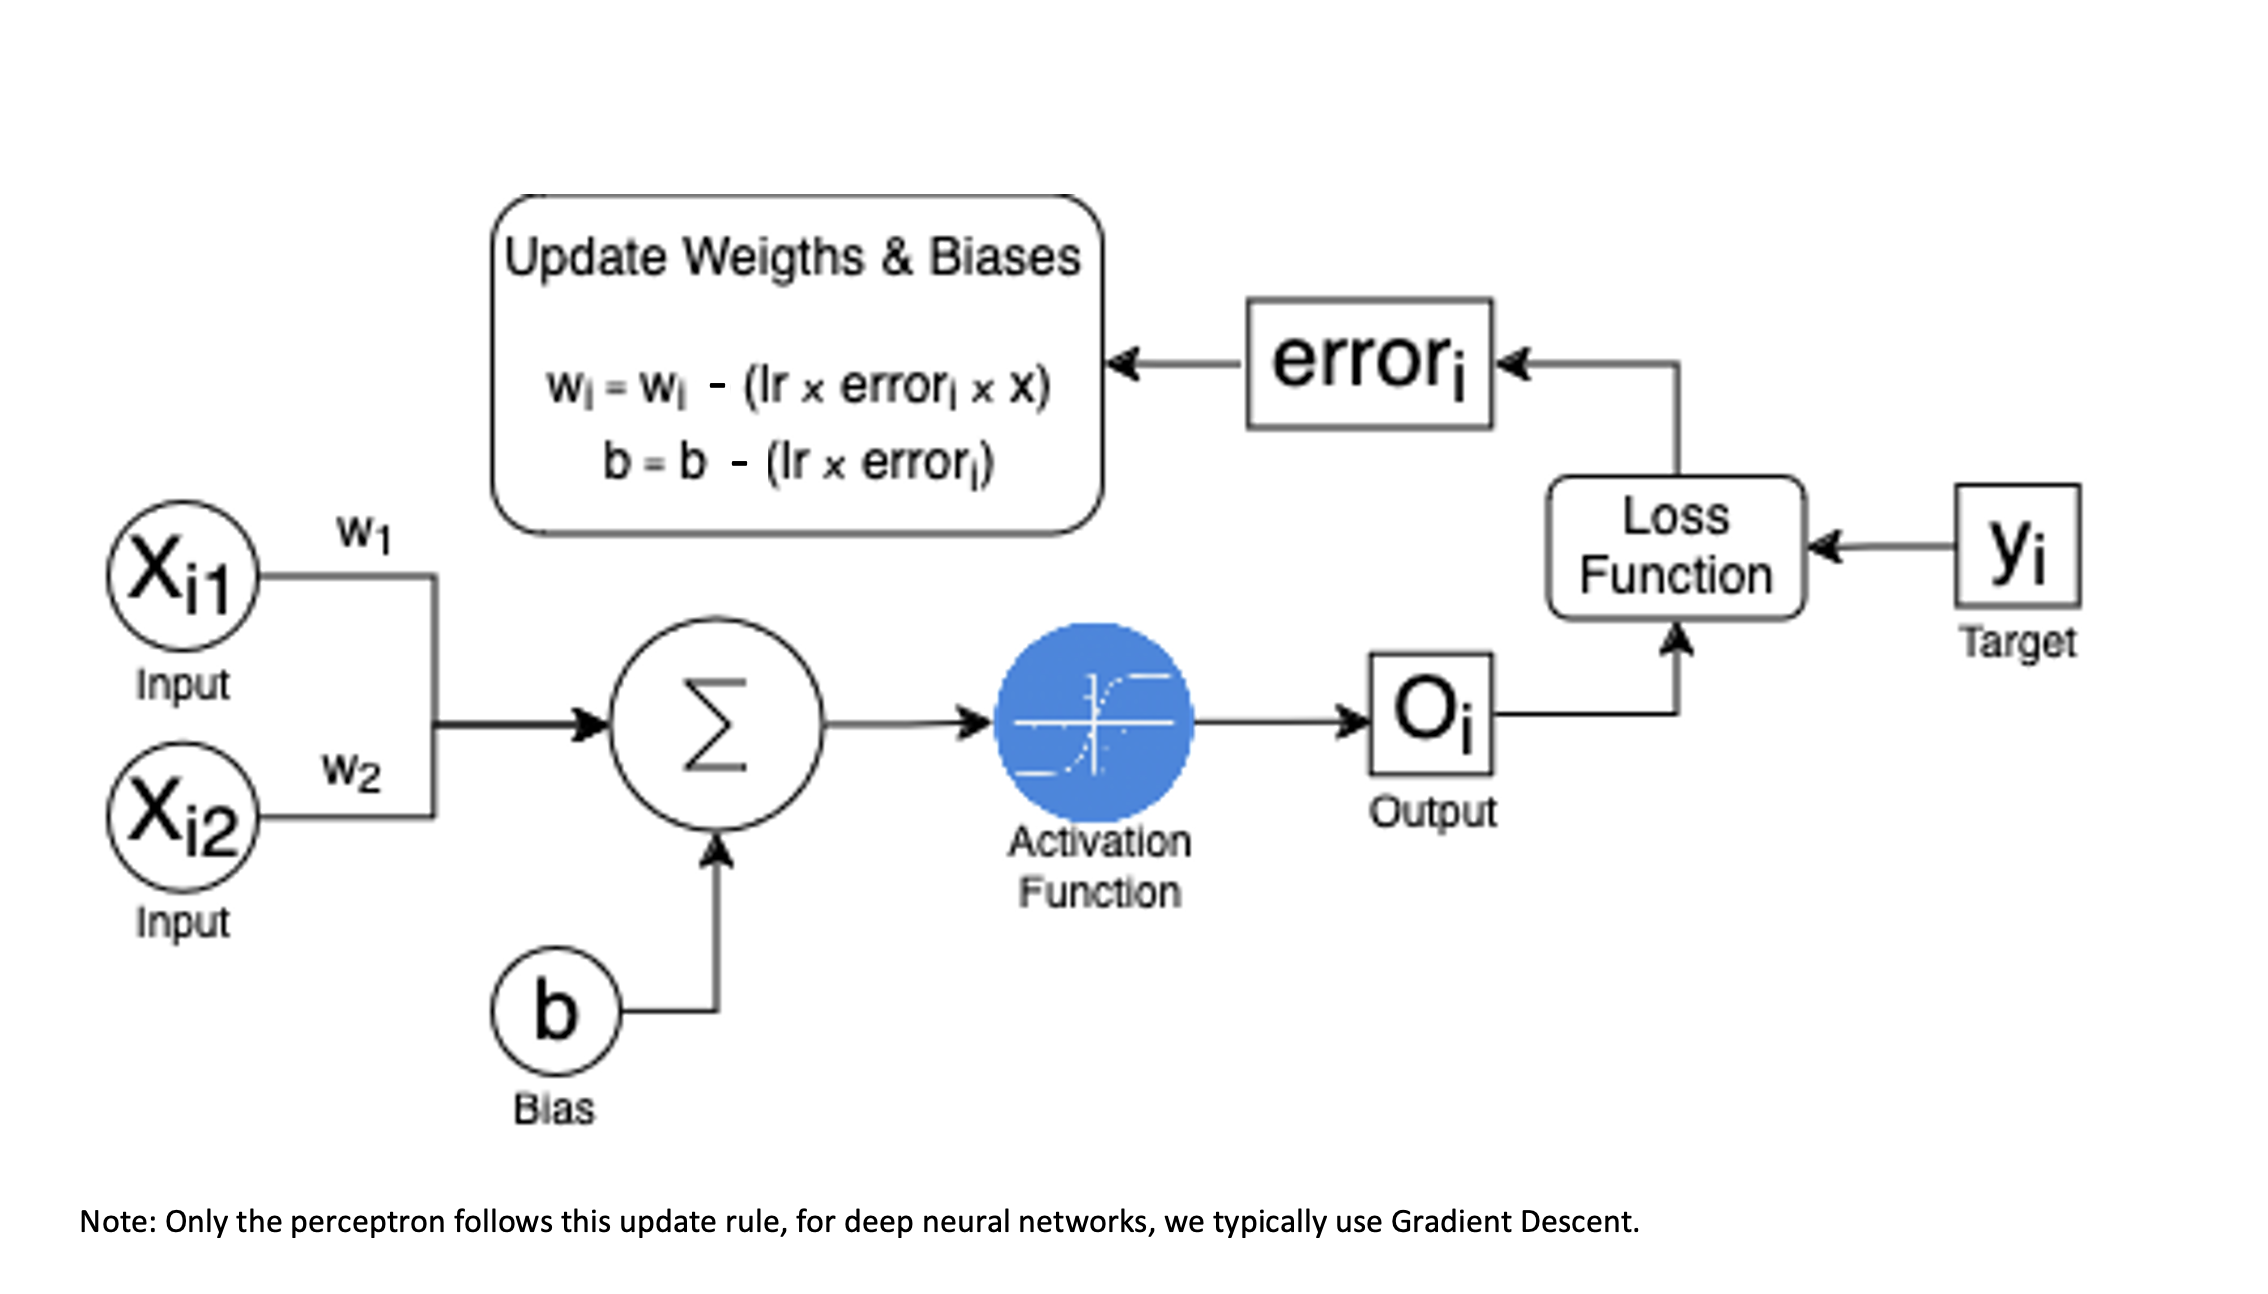

In [10]:
display(Image(filename=project_path+'images/class4/delta_rule.png', width=800, height=700))

### Exercise 7: Implementing a Binary Classifier Perceptron Class a subclass of Perceptron

Create a class called `BinaryClassifierPerceptron` base class to implement a binary classification model.

1. **Methods:**
   - `predict_proba(X)`: Predicts the probabilities using the current weights and bias (convert logits into probabilities).
   - `predict(X)`: Converts the probabilities to binary labels that are the final prediction (if bigger than 0.5 is 1, 0 otherwise.)

In [ ]:
# Base class for Perceptron
class Perceptron:
    def __init__(self, learning_rate=1e-5, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_values = []

    def initialize_parameters(self, input_size):
        # Initialize weights for each input feature and a single bias value
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()

In [ ]:
class BinaryClassifierPerceptron(Perceptron):
    def __init__(self, learning_rate=1e-5, epochs=100):
        super().__init__(learning_rate, epochs)

    def predict_proba(self, X):
        pass
    def predict(self, X):
        pass

### Exercise 8: Implementing `BinaryClassifierPerceptronSGD` a subclass of `BinaryClassifierPerceptron`

Implement the `BinaryClassifierPerceptronSGD` class to perform binary classification using Stochastic Gradient Descent (SGD). Learn how to apply sigmoid activation and compute the binary cross-entropy loss for classification tasks.

1. **New Attributes:**
   - `loss_fn`: The loss function used to calculate the error, use `nn.BCELoss()`. (`import torch.nn as nn`)

2. **New Methods:**
   - `activation_function(z)`: Implements the sigmoid activation function.1.
   - `binary_cross_entropy(y_true, y_pred):` Uses the BCE Loss to calculate the loss.
   - `plot_loss()`: Plots the loss over epochs.

#### **Mathematical Background:**
1. **Weight Update Formula:**
   $$
   w = w + \eta \cdot (y_i - \hat{y}_i) \cdot x_i
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $ \eta $ is the learning rate.
   - $ x_i $ is the input feature.
2. **Bias Update Formula:**
   $$
   b = b + \eta \cdot (y_i - \hat{y}_i)
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $  \eta $  is the learning rate.

3. **Loss Function:**
   The Binary Cross-Entropy Loss measures the error for binary classification tasks:

   $$
   \text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
   $$

   Where:
   - $ n $ is the number of data points.
   - $ y_i $ is the actual class label (0 or 1).
   - $ \hat{y}_i $ is the predicted probability, calculated using the **sigmoid activation function**:

4. **Sigmoid Activation Function:**
   $$
   \hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}
   $$

   And:
   - $ z_i = w \cdot x_i + b $
   - $ w $ is the weight vector.
   - $ x_i $ is the input feature vector.
   - $ b $ is the bias term.

#### **Task:**
1. **Implement the `activation_function`**

2. **Implement the `binary_cross_entropy`**

3. **Complete the `train` method by implementing the following functionalities:**
   - Apply the sigmoid function to convert linear outputs into probabilities.
   - Use Binary Cross-Entropy Loss to measure error.
   - Update weights and bias using gradient descent.
   - Track and store the BCE loss at the end of each epoch.

4. **Implement Plotting Methods:**
   - Define `plot_loss()` to plot `self.loss_values` over epochs.

In [ ]:
import torch.nn as nn
import torch

class BinaryClassifierPerceptronSGD(BinaryClassifierPerceptron):
    def __init__(self, learning_rate=1e-5, epochs=100):
        pass

    def activation_function(self, z):
        # Sigmoid activation function
        pass

    def binary_cross_entropy(self, y_true, y_pred):
        # Compute the binary cross-entropy loss
        # Requires the inputs to be between 0 and 1 (probabilities)
        pass

    def train(self, X, y):
        # Ensure X and y are numpy arrays

        # Initialize parameters based on the number of features in the input

        for epoch in range(self.epochs):
            for i in range(X.shape[0]):  # Loop through each sample


                # Compute linear combination of inputs and weights, and apply sigmoid
                pass
                # Calculate the error

                # Update weights and bias using gradient descent


            # Calculate binary cross-entropy loss for the epoch
        pass

    def plot_loss(self):
        # Plot the loss over epochs
        plt.figure(figsize=(10, 5))
        plt.plot(self.loss_values, color='blue', label='Binary Cross-Entropy Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss Curve using Binary Cross-Entropy Loss with Stochastic Gradient Descent')
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
np.random.seed(0)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND gate

In [ ]:
# Print the predicted values vs actual values
y_pred = model.predict(X)
print(f"Predicted Values: {y_pred}")
print(f"Actual Values: {y}")

That is as far as our single-layer perceptron can go :(

The XOR problem requires a decision boundary that is not linear. A single-layer perceptron can only create a linear decision boundary (i.e., a straight line) and thus cannot correctly classify the XOR pattern.

## Part 2 - What is PyTorch?
- Most popular research deep learning framework
- Write fast deep learning code in Python (able to run on a GPU/many
GPUs)
- Able to access many pre-built deep learning models (Torch Hub/
torchvision.models)
- Whole stack: preprocess data, model data, deploy model in your
application/cloud
- Originally designed and used in-house by Facebook/Meta (now open-
source and used by companies such as Tesla, Microsoft, OpenAI)

A big part of deep learning (and learning to code in general) is getting familiar with the documentation of a certain framework you're using. We'll be using the PyTorch documentation a lot throughout the rest of this course.
  * The documentation on [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html#torch-tensor).
  * The documentation on [`torch.cuda`](https://pytorch.org/docs/master/notes/cuda.html#cuda-semantics).


### NumPy

NumPy provides an n-dimensional array object and many functions for manipulating these arrays. Numpy is a generic framework for scientific computing; it does not know anything about computation graphs, or deep learning, or gradients.
Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.

### PyTorch Tensor
A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing. Also unlike numpy, PyTorch Tensors can utilize GPUs to accelerate their numeric computations. To run a PyTorch Tensor on GPU, you simply need to specify the correct device.


### Tensors and NumPy Array: Key-Differences
| Feature                   | PyTorch Tensors                                     | NumPy Arrays                                       |
| ------------------------- | --------------------------------------------------- | --------------------------------------------------- |
| Definition                | Multi-dimensional arrays optimized for deep learning. | Multi-dimensional arrays with a uniform data type. |
| Syntax and Interface      | `torch.tensor()`                                    | `np.array()`                                        |
| Automatic Differentiation | Built-in support using PyTorch's Autograd module.    | No support.                                          |
| GPU Support               | Native integration with CUDA-enabled GPUs.          | Limited support, requires additional libraries.      |
| Computational Graph       | Dynamic, modifiable at runtime.                      | Static, defined before execution.                   |
| Performance               | Efficient GPU acceleration for deep learning tasks.  | Efficient for general computations.                |
| Deployment                | Supports deployment in production environments.      | Requires additional steps for integration.         |
| Memory Management          | Automatic with garbage collection.                   | Manual, requires explicit deallocation.             |
| Integration               | Native with PyTorch's deep learning ecosystem.      | Additional steps for integration with frameworks.   |
| Parallelization           | Supports parallel operations across CPU/GPU cores.  | Depends on BLAS libraries and hardware.            |


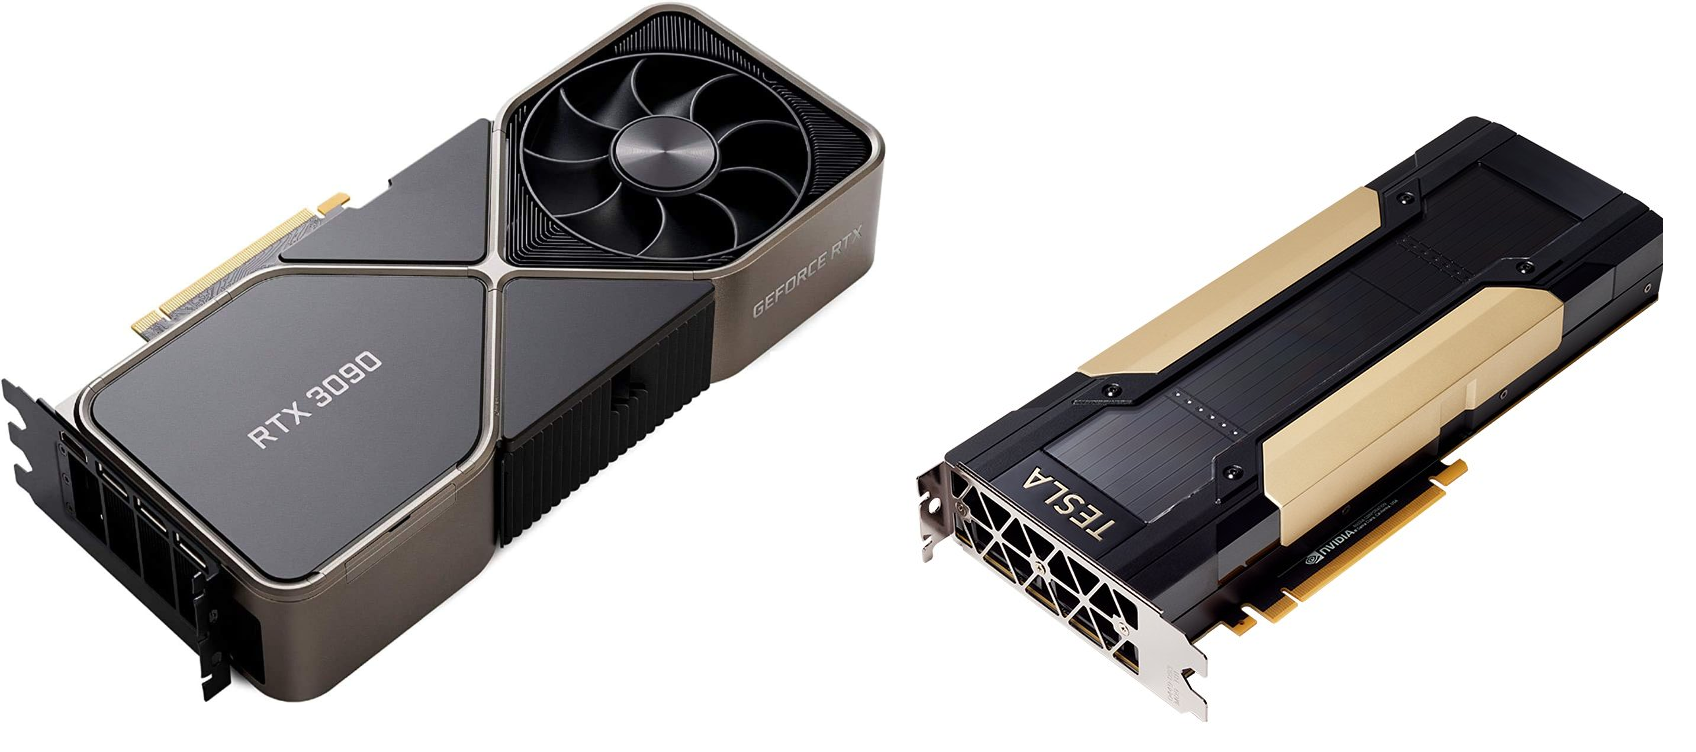

In [8]:
display(Image(filename=project_path+'images/class5/gpus.png', width=550, height=550))

### What are GPUs?

A GPU, or graphics processing unit, is a computer processor that uses accelerated calculations to render intensive high-resolution images and graphics. While originally designed for rendering 2D and 3D images, videos, and animations on a computer, today’s GPUs are used in applications far beyond graphics processing, including big analytics and machine learning. GPUs are well-suited for deep learning due to their unique capabilities:

- Massive Parallelism: GPUs have thousands of cores designed to handle multiple tasks simultaneously, making them ideal for the parallel computations in deep learning.

- High Throughput: GPUs can perform trillions of calculations per second, accelerating model training and handling large batches of data efficiently.

- Optimized for Matrix Operations: Specialized hardware and software libraries allow GPUs to excel at matrix operations, which are fundamental to deep learning.

- High Memory Bandwidth: GPUs can quickly move large amounts of data, crucial for deep learning's data-intensive tasks.

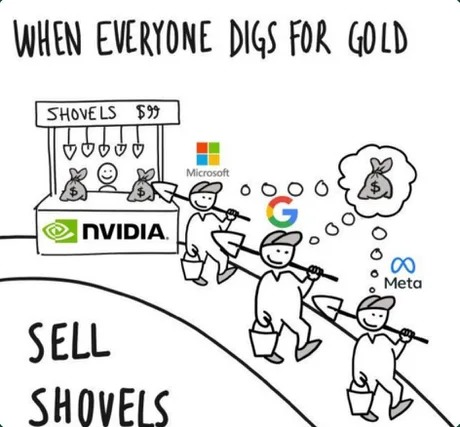

In [9]:
display(Image(filename=project_path+'images/class5/nvidia_meme.jpeg', width=500, height=500))

## Part 3 - Introduction to PyTorch

PyTorch is a popular deep learning framework that was introduced in 2016. It has a slightly lower-level API than Keras, but it is very easy to use when it comes to defining models with custom loss functions or exotic architectures with a structure that depends on the input data (e.g. for NLP). It is very popular among researchers and kagglers - a little less in the industry (yet) compared to TensorFlow / Keras.

http://pytorch.org/

### Installation

You can check the version number of the currently installed pytorch package with: `import torch; print(torch.__version__)`.

If you do not have a CUDA-based GPU on your machine please feel free to use the CPU-only version as those introductory notebooks do not require a GPU.

Up-to-date installation instructions can be found on the official home page of the project: http://pytorch.org.

For Windows:

`poetry source add --priority=explicit pytorch-gpu https://download.pytorch.org/whl/cu118`

`poetry add --source pytorch-gpu torch torchvision torchaudio`

For MacOS:

`poetry add torch`

### Importing PyTorch

> **Note:** Before running any of the code in this notebook, you should have gone through the [PyTorch setup steps](https://pytorch.org/get-started/locally/).
>
> However, **if you're running on Google Colab**, everything should work (Google Colab comes with PyTorch and other libraries installed).

Let's start by importing PyTorch and checking the version we're using.

In [ ]:
import torch
torch.__version__

### Introduction to tensors

Now we've got PyTorch imported, it's time to learn about tensors.

Tensors are the fundamental building block of machine learning.

Their job is to represent data in a numerical way.

For example, you could represent an image as a tensor with shape `[3, 224, 224]` which would mean `[colour_channels, height, width]`, as in the image has `3` colour channels (red, green, blue), a height of `224` pixels and a width of `224` pixels.

![example of going from an input image to a tensor representation of the image, image gets broken down into 3 colour channels as well as numbers to represent the height and width](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-tensor-shape-example-of-image.png)

In tensor-speak (the language used to describe tensors), the tensor would have three dimensions, one for `colour_channels`, `height` and `width`.

### Creating tensors

PyTorch loves tensors. So much so there's a whole documentation page dedicated to the [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) class.

The first thing we're going to create is a **scalar**.

A scalar is a single number and in tensor-speak it's a zero dimension tensor.

See how the above printed out `tensor(7)`?

That means although `scalar` is a single number, it's of type `torch.Tensor`.

We can check the dimensions of a tensor using the `ndim` attribute.

What if we wanted to retrieve the number from the tensor?

As in, turn it from `torch.Tensor` to a Python integer?

To do we can use the `item()` method.

Okay, now let's see a **vector**.

A vector is a single dimension tensor but can contain many numbers.

As in, you could have a vector `[3, 2]` to describe `[bedrooms, bathrooms]` in your house. Or you could have `[3, 2, 2]` to describe `[bedrooms, bathrooms, car_parks]` in your house.

The important trend here is that a vector is flexible in what it can represent (the same with tensors).

`vector` now contains two 7's.

How many dimensions do you think it'll have?

Hmm, that's strange, `vector` contains two numbers but only has a single dimension.

I'll let you in on a trick.

You can tell the number of dimensions a tensor in PyTorch has by the number of square brackets on the outside (`[`) and you only need to count one side.

How many square brackets does `vector` have?

Another important concept for tensors is their `shape` attribute. The shape tells you how the elements inside them are arranged.

Let's check out the shape of `vector`.

The above returns `torch.Size([2])` which means our vector has a shape of `[2]`. This is because of the two elements we placed inside the square brackets (`[7, 7]`).

Let's now see a **matrix**.

Matrices are as flexible as vectors, except they've got an extra dimension.

`MATRIX` has two dimensions (did you count the number of square brakcets on the outside of one side?).

What `shape` do you think it will have?

We get the output torch.Size([2, 2]) because MATRIX is two elements deep and two elements wide.

How about we create a tensor?


I want to stress that tensors can represent almost anything.

![a simple tensor in google sheets showing day of week, steak sales and almond butter sales](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00_simple_tensor.png)

How many dimensions do you think it has? (hint: use the square bracket counting trick)

And what about its shape?

Alright, it outputs `torch.Size([1, 3, 3])`.

The dimensions go outer to inner.

That means there's 1 dimension of 3 by 3.

![example of different tensor dimensions](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-pytorch-different-tensor-dimensions.png)

> **Note:** You might've noticed me using lowercase letters for `scalar` and `vector` and uppercase letters for `MATRIX` and `TENSOR`. This was on purpose. In practice, you'll often see scalars and vectors denoted as lowercase letters such as `y` or `a`. And matrices and tensors denoted as uppercase letters such as `X` or `W`.
>
> You also might notice the names martrix and tensor used interchangably. This is common. Since in PyTorch you're often dealing with `torch.Tensor`s (hence the tensor name), however, the shape and dimensions of what's inside will dictate what it actually is.

Let's summarise.

| Name | What is it? | Number of dimensions | Lower or upper (usually/example) |
| ----- | ----- | ----- | ----- |
| **scalar** | a single number | 0 | Lower (`a`) |
| **vector** | a number with direction (e.g. wind speed with direction) but can also have many other numbers | 1 | Lower (`y`) |
| **matrix** | a 2-dimensional array of numbers | 2 | Upper (`Q`) |
| **tensor** | an n-dimensional array of numbers | can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector | Upper (`X`) |

![scalar vector matrix tensor and what they look like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-scalar-vector-matrix-tensor.png)

### Tensor datatypes

There are many different [tensor datatypes available in PyTorch](https://pytorch.org/docs/stable/tensors.html#data-types).

Some are specific for CPU and some are better for GPU.

Getting to know which is which can take some time.

Generally if you see `torch.cuda` anywhere, the tensor is being used for GPU (since Nvidia GPUs use a computing toolkit called CUDA).

The most common type (and generally the default) is `torch.float32` or `torch.float`.

This is referred to as "32-bit floating point".

But there's also 16-bit floating point (`torch.float16` or `torch.half`) and 64-bit floating point (`torch.float64` or `torch.double`).

And to confuse things even more there's also 8-bit, 16-bit, 32-bit and 64-bit integers.

Plus more!

> **Note:** An integer is a flat round number like `7` whereas a float has a decimal `7.0`.

The reason for all of these is to do with **precision in computing**.

Precision is the amount of detail used to describe a number.

The higher the precision value (8, 16, 32), the more detail and hence data used to express a number.

This matters in deep learning and numerical computing because you're making so many operations, the more detail you have to calculate on, the more compute you have to use.

So lower precision datatypes are generally faster to compute on but sacrifice some performance on evaluation metrics like accuracy (faster to compute but less accurate).

> **Resources:**
  * See the [PyTorch documentation for a list of all available tensor datatypes](https://pytorch.org/docs/stable/tensors.html#data-types).
  * Read the [Wikipedia page for an overview of what precision in computing](https://en.wikipedia.org/wiki/Precision_(computer_science)) is.

Let's see how to create some tensors with specific datatypes. We can do so using the `dtype` parameter.

In [ ]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

Aside from shape issues (tensor shapes don't match up), two of the other most common issues you'll come across in PyTorch are datatype and device issues.

For example, one of tensors is `torch.float32` and the other is `torch.float16` (PyTorch often likes tensors to be the same format).

Or one of your tensors is on the CPU and the other is on the GPU (PyTorch likes calculations between tensors to be on the same device).

We'll see more of this device talk later on.

For now let's create a tensor with `dtype=torch.float16`.

In [ ]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

### Getting information from tensors

Once you've created tensors (or someone else or a PyTorch module has created them for you), you might want to get some information from them.

We've seen these before but three of the most common attributes you'll want to find out about tensors are:
* `shape` - what shape is the tensor? (some operations require specific shape rules)
* `dtype` - what datatype are the elements within the tensor stored in?
* `device` - what device is the tensor stored on? (usually GPU or CPU)

Let's create a random tensor and find out details about it.

In [ ]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

> **Note:** When you run into issues in PyTorch, it's very often one to do with one of the three attributes above. So when the error messages show up, sing yourself a little song called "what, what, where":
  * "*what shape are my tensors? what datatype are they and where are they stored? what shape, what datatype, where where where*"

### Manipulating tensors (tensor operations)

In deep learning, data (images, text, video, audio, protein structures, etc) gets represented as tensors.

A model learns by investigating those tensors and performing a series of operations (could be 1,000,000s+) on tensors to create a representation of the patterns in the input data.

These operations are often a wonderful dance between:
* Addition
* Substraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

And that's it. Sure there are a few more here and there but these are the basic building blocks of neural networks.

Stacking these building blocks in the right way, you can create the most sophisticated of neural networks (just like lego!).

### Basic operations

Let's start with a few of the fundamental operations, addition (`+`), subtraction (`-`), mutliplication (`*`).

They work just as you think they would.

In [ ]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])


In [ ]:
# Multiply it by 10


Notice how the tensor values above didn't end up being `tensor([110, 120, 130])`, this is because the values inside the tensor don't change unless they're reassigned.

In [ ]:
# Tensors don't change unless reassigned
tensor

Let's subtract a number and this time we'll reassign the `tensor` variable.

In [ ]:
# Subtract and reassign
tensor =

In [ ]:
# Add and reassign
tensor =

PyTorch also has a bunch of built-in functions like [`torch.mul()`](https://pytorch.org/docs/stable/generated/torch.mul.html#torch.mul) (short for multiplication) and [`torch.add()`](https://pytorch.org/docs/stable/generated/torch.add.html) to perform basic operations.

In [ ]:
# Can also use torch functions


In [ ]:
# Original tensor is still unchanged
tensor

In [ ]:
# Can also use torch functions


In [ ]:
# Original tensor is still unchanged
tensor

However, it's more common to use the operator symbols like `*` instead of `torch.mul()`

In [ ]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

### Matrix multiplication

One of the most common operations in machine learning and deep learning algorithms (like neural networks) is [matrix multiplication](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

PyTorch implements matrix multiplication functionality in the [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html) method.

The main two rules for matrix multiplication to remember are:

1. The **inner dimensions** must match:
  * `(3, 2) @ (3, 2)` won't work
  * `(2, 3) @ (3, 2)` will work
  * `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
 * `(2, 3) @ (3, 2)` -> `(2, 2)`
 * `(3, 2) @ (2, 3)` -> `(3, 3)`

> **Note:** "`@`" in Python is the symbol for matrix multiplication.

> **Resource:** You can see all of the rules for matrix multiplication using `torch.matmul()` [in the PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html).

Let's create a tensor and perform element-wise multiplication and matrix multiplication on it.



In [ ]:
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape

The difference between element-wise multiplication and matrix multiplication is the addition of values.

For our `tensor` variable with values `[1, 2, 3]`:

| Operation | Calculation | Code |
| ----- | ----- | ----- |
| **Element-wise multiplication** | `[1*1, 2*2, 3*3]` = `[1, 4, 9]` | `tensor * tensor` |
| **Matrix multiplication** | `[1*1 + 2*2 + 3*3]` = `[14]` | `tensor.matmul(tensor)` |


In [ ]:
# Element-wise matrix multiplication


In [ ]:
# Matrix multiplication


In [ ]:
# Can also use the "@" symbol for matrix multiplication, though not recommended


### Reshaping, stacking, squeezing and unsqueezing

Often times you'll want to reshape or change the dimensions of your tensors without actually changing the values inside them.

To do so, some popular methods are:

| Method | One-line description |
| ----- | ----- |
| [`torch.reshape(input, shape)`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) | Reshapes `input` to `shape` (if compatible), can also use `torch.Tensor.reshape()`. |
| [`torch.stack(tensors, dim=0)`](https://pytorch.org/docs/1.9.1/generated/torch.stack.html) | Concatenates a sequence of `tensors` along a new dimension (`dim`), all `tensors` must be same size. |
| [`torch.squeeze(input)`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) | Squeezes `input` to remove all the dimenions with value `1`. |
| [`torch.unsqueeze(input, dim)`](https://pytorch.org/docs/1.9.1/generated/torch.unsqueeze.html) | Returns `input` with a dimension value of `1` added at `dim`. |


Why do any of these?

Because deep learning models (neural networks) are all about manipulating tensors in some way. And because of the rules of matrix multiplication, if you've got shape mismatches, you'll run into errors. These methods help you make sure the right elements of your tensors are mixing with the right elements of other tensors.

Let's try them out.

First, we'll create a tensor.

In [ ]:
# Create a tensor
import torch


Now let's add an extra dimension with `torch.reshape()`.

In [ ]:
# Add an extra dimension
x_reshaped =

If we wanted to stack our new tensor on top of itself five times, we could do so with `torch.stack()`.

In [ ]:
# Stack tensors on top of each other
x_stacked =

How about removing all single dimensions from a tensor?

To do so you can use `torch.squeeze()` (I remember this as *squeezing* the tensor to only have dimensions over 1).

In [ ]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

And to do the reverse of `torch.squeeze()` you can use `torch.unsqueeze()` to add a dimension value of 1 at a specific index.

In [ ]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

### Reproducibility (trying to take the random out of random)

As you learn more about neural networks and machine learning, you'll start to discover how much randomness plays a part.

Well, pseudorandomness that is. Because after all, as they're designed, a computer is fundamentally deterministic (each step is predictable) so the randomness they create are simulated randomness (though there is debate on this too, but since I'm not a computer scientist, I'll let you find out more yourself).

How does this relate to neural networks and deep learning then?

We've discussed neural networks start with random numbers to describe patterns in data (these numbers are poor descriptions) and try to improve those random numbers using tensor operations (and a few other things we haven't discussed yet) to better describe patterns in data.

In short:

``start with random numbers -> tensor operations -> try to make better (again and again and again)``

Although randomness is nice and powerful, sometimes you'd like there to be a little less randomness.

Why?

So you can perform repeatable experiments.

For example, you create an algorithm capable of achieving X performance.

And then your friend tries it out to verify you're not crazy.

How could they do such a thing?

That's where **reproducibility** comes in.

In other words, can you get the same (or very similar) results on your computer running the same code as I get on mine?

Let's see a brief example of reproducibility in PyTorch.

We'll start by creating two random tensors, since they're random, you'd expect them to be different right?

In [ ]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Just as you might've expected, the tensors come out with different values.

But what if you wanted to created two random tensors with the *same* values.

As in, the tensors would still contain random values but they would be of the same flavour.

That's where [`torch.manual_seed(seed)`](https://pytorch.org/docs/stable/generated/torch.manual_seed.html) comes in, where `seed` is an integer (like `42` but it could be anything) that flavours the randomness.

Let's try it out by creating some more *flavoured* random tensors.

In [ ]:
import torch
import random

# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

### Running tensors on GPUs (and making faster computations)

Deep learning algorithms require a lot of numerical operations.

And by default these operations are often done on a CPU (computer processing unit).

However, there's another common piece of hardware called a GPU (graphics processing unit), which is often much faster at performing the specific types of operations neural networks need (matrix multiplications) than CPUs.

Your computer might have one.

If so, you should look to use it whenever you can to train neural networks because chances are it'll speed up the training time dramatically.

There are a few ways to first get access to a GPU and secondly get PyTorch to use the GPU.

> **Note:** When I reference "GPU" throughout this course, I'm referencing a [Nvidia GPU with CUDA](https://developer.nvidia.com/cuda-gpus) enabled (CUDA is a computing platform and API that helps allow GPUs be used for general purpose computing & not just graphics) unless otherwise specified.



### Requirements to use GPU (on Windows):
1. Hardware Requirements

    - NVIDIA GPU: A CUDA-capable GPU is required. Check the CUDA compute capability of your GPU here. Compute capability should be at least 3.0.
    - GPU Memory: Depending on your model, ensure you have enough GPU memory. Typically, 4GB or more is recommended.

2. Software Requirements

    - CUDA Toolkit: The CUDA Toolkit version should be compatible with your PyTorch version. - PyTorch provides compatibility information for different CUDA versions.
    - NVIDIA Drivers: Install drivers that support the CUDA version you want to use. For the latest PyTorch versions, CUDA 11.x or higher is typically recommended.
        Check the driver version compatibility with the CUDA version on the CUDA Compatibility Guide.
    - cuDNN: NVIDIA's Deep Neural Network library (cuDNN) must be compat

CUDA Toolkit: https://developer.nvidia.com/cuda-toolkit-archive \
cuDNN: https://developer.nvidia.com/cudnn

#### 1. Getting a GPU

You may already know what's going on when I say GPU. But if not, there are a few ways to get access to one.

| **Method** | **Difficulty to setup** | **Pros** | **Cons** | **How to setup** |
| ----- | ----- | ----- | ----- | ----- |
| Google Colab | Easy | Free to use, almost zero setup required, can share work with others as easy as a link | Doesn't save your data outputs, limited compute, subject to timeouts | [Follow the Google Colab Guide](https://colab.research.google.com/notebooks/gpu.ipynb) |
| Use your own | Medium | Run everything locally on your own machine | GPUs aren't free, require upfront cost | Follow the [PyTorch installation guidelines](https://pytorch.org/get-started/locally/) |
| Cloud computing (AWS, GCP, Azure) | Medium-Hard | Small upfront cost, access to almost infinite compute | Can get expensive if running continually, takes some time to setup right | Follow the [PyTorch installation guidelines](https://pytorch.org/get-started/cloud-partners/) |

There are more options for using GPUs but the above three will suffice for now.

Personally, I use a combination of Google Colab and my own personal computer for small scale experiments (and creating this course) and go to cloud resources when I need more compute power.

To check if you've got access to a Nvidia GPU, you can run `!nvidia-smi` where the `!` (also called bang) means "run this on the command line".



#### 2. Getting PyTorch to run on the GPU

PyTorch on Windows uses CUDA (Compute Unified Device Architecture) toolkit developed by NVIDIA to accelerate deep learning computations. CUDA is a parallel computing platform and programming model that enables software developers to harness the power of NVIDIA GPUs for general-purpose processing.

The `cuda` device in PyTorch serves as a conduit between PyTorch's computational graphs and the CUDA backend.

In [ ]:
# Check for GPU
import torch
torch.cuda.is_available()

If the above outputs `True`, PyTorch can see and use the GPU, if it outputs `False`, it can't see the GPU and in that case, you'll have to go back through the installation steps.

Now, let's say you wanted to setup your code so it ran on CPU *or* the GPU if it was available.

That way, if you or someone decides to run your code, it'll work regardless of the computing device they're using.

Let's create a `device` variable to store what kind of device is available.

In [ ]:
import torch

# Two options: 'cuda' (for GPU) or 'cpu' (if no GPU available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("Device type set:", "GPU" if device.type == "cuda" else "CPU")

#### 2.1 Getting PyTorch to run on Apple Silicon (Apple's M1/M2/M3 GPUs)

PyTorch on macOS uses Metal Performance Shaders (MPS) framework to accelerate machine learning computational graphs and primitives. Metal is Apple's low-level API for programming GPUs, while MPS is a higher-level framework built on top of Metal that provides optimized implementations of common machine learning operations.

The `mps` device in PyTorch serves as a bridge between PyTorch's computational graphs and the MPS backend.

In [ ]:
# Check for Apple Silicon GPU
import torch
torch.backends.mps.is_available() # Note this will print false if you're not running on a Mac

In [ ]:
## Check that MPS is available
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")
else:
    device = torch.device("mps")
    print("Device type set:", "GPU" if device.type == "mps" else "CPU")

#### 3. Putting tensors (and models) on the GPU

You can put tensors (and models, we'll see this later) on a specific device by calling [`to(device)`](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) on them. Where `device` is the target device you'd like the tensor (or model) to go to.

Why do this?

GPUs offer far faster numerical computing than CPUs do and if a GPU isn't available, because of our **device agnostic code** (see above), it'll run on the CPU.

> **Note:** Putting a tensor on GPU using `to(device)` (e.g. `some_tensor.to(device)`) returns a copy of that tensor, e.g. the same tensor will be on CPU and GPU. To overwrite tensors, reassign them:
>
> `some_tensor = some_tensor.to(device)`

Let's try creating a tensor and putting it on the GPU (if it's available).

In [ ]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

In [ ]:
# Move tensor to GPU (if available)


#### 4. Moving tensors back to the CPU

What if we wanted to move the tensor back to CPU?

For example, you'll want to do this if you want to interact with your tensors with NumPy (NumPy does not leverage the GPU).

Let's try using the [`torch.Tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html) method on our `tensor_on_gpu`.

In [ ]:
# If tensor is on GPU, can't transform it to NumPy (this will error)


Instead, to get a tensor back to CPU and usable with NumPy we can use [`Tensor.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html).

This copies the tensor to CPU memory so it's usable with CPUs.

In [ ]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu =

In [ ]:
tensor_back_on_cpu

### Exercises - Tensor Manipulation

1. Create a random tensor with shape `(7, 7)`.

2. Perform a matrix multiplication on the tensor from 2 with another random tensor with shape `(1, 7)` (hint: you may have to transpose the second tensor).

3. Set the random seed to `0` and do 2 & 3 over again.

The output should be:
```
(tensor([[1.8542],
         [1.9611],
         [2.2884],
         [3.0481],
         [1.7067],
         [2.5290],
         [1.7989]]), torch.Size([7, 1]))
```

4. Speaking of random seeds, we saw how to set it with `torch.manual_seed()` but is there a GPU equivalent? (hint: you'll need to look into the documentation for `torch.cuda` for this one)
  * If there is, set the GPU random seed to `1234`.


5. Create two random tensors of shape `(2, 3)` and send them both to the GPU (you'll need access to a GPU for this). Set `torch.manual_seed(1234)` when creating the tensors (this doesn't have to be the GPU random seed). The output should be something like:

```
Device: cuda
(tensor([[0.0290, 0.4019, 0.2598],
         [0.3666, 0.0583, 0.7006]], device='cuda:0'),
 tensor([[0.0518, 0.4681, 0.6738],
         [0.3315, 0.7837, 0.5631]], device='cuda:0'))
```

6. Perform a matrix multiplication on the tensors you created in 6 (again, you may have to adjust the shapes of one of the tensors).

The output should look like:
```
(tensor([[0.3647, 0.4709],
         [0.5184, 0.5617]], device='cuda:0'), torch.Size([2, 2]))
```

7. Find the maximum and minimum values of the output of 7.

8. Find the maximum and minimum index values of the output of 7.

9. Make a random tensor with shape `(1, 1, 1, 10)` and then create a new tensor with all the `1` dimensions removed to be left with a tensor of shape `(10)`. Set the seed to `7` when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.

The output should look like:

```
tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]]) torch.Size([1, 1, 1, 10])
tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513]) torch.Size([10])
```

## Part 4 - Computational Graphs in PyTorch

Computational graphs provide a powerful framework for representing and analyzing complex mathematical functions in deep learning, particularly those involved in neural networks. These graphs, structured as directed acyclic graphs (DAGs), visually depict the flow of data and computations through a series of interconnected nodes and edges.

- Nodes: Nodes represent fundamental building blocks of the computation, including:
  - Variables: Represent the inputs, parameters (weights), and intermediate results.
  - Operations: Mathematical operations (e.g., addition, multiplication) or functions (e.g., activation functions) applied to the data.

- Edges: Edges represent the flow of data between nodes, indicating how the output of one node is passed as input to another.


**Consider a neural network function where $ y $ is computed from a tensor $ x $ using the following transformation:**

$ y = W_h \cdot \sigma(W_x \cdot x) $

Here:
- $ x $ is the input tensor.
- $ W_x $ and $ W_h $ represent parameters of the neural network.
- $ \sigma $ denotes an activation function applied element-wise to the result of $ W_x \cdot x $.

### Forward Pass

Let $\mathbf{W_h}$ be the weight matrix for the hidden state with shape $(4, 4)$.

Let $\mathbf{W_x}$ be the weight matrix for the input with shape $(4, 2)$.

Let $\mathbf{x}$ be the input vector at the current time step with shape $(1, 2)$.

Let $\mathbf{h_{prev}}$ be the previous hidden state vector with shape $(1, 4)$.

$\mathbf{i2h} = \mathbf{W_x} \mathbf{x}^T$
Here, $\mathbf{W_x}$ is of shape $(4, 2)$ and $\mathbf{x}^T$ is the transpose of $\mathbf{x}$ with shape $(2, 1)$. The result $\mathbf{i2h}$ is a matrix of shape $(4, 1)$.

$\mathbf{h2h} = \mathbf{W_h} \mathbf{h_{prev}}^T$
Here, $\mathbf{W_h}$ is of shape $(4, 4)$ and $\mathbf{h_{prev}}^T$ is the transpose of $\mathbf{h_{prev}}$ with shape $(4, 1)$. The result $\mathbf{h2h}$ is a matrix of shape $(4, 1)$.

$\mathbf{h_{next\_raw}} = \mathbf{h2h} + \mathbf{i2h}$

Both $\mathbf{h2h}$ and $\mathbf{i2h}$ are matrices of shape $(4, 1)$. The element-wise addition results in $\mathbf{h_{next\_raw}}$, which is also of shape $(4, 1)$.


$\mathbf{h_{next}} = \tanh(\mathbf{h_{next\_raw}})$
The $\tanh$ function is applied element-wise to $\mathbf{h_{next\_raw}}$, resulting in $\mathbf{h_{next}}$ with shape $(4, 1)$.


$\text{loss} = \sum \mathbf{h_{next}}$
The sum of all elements in $\mathbf{h_{next}}$ is computed to get the loss.

### Backward Pass

The `loss.backward()` function in PyTorch is a critical step in the process of training neural networks. It performs backpropagation, which is the process of calculating the gradient of the loss function with respect to each of the model's parameters.


In [ ]:
print("W_h values:\n", W_h)
print("\n")
print("W_h gradients:\n", W_h.grad)

In [ ]:
print("W_x values:\n", W_x)
print("\n")
print("W_x gradients:\n", W_x.grad)

In [ ]:
# Save the W_h and W_x tensors copy
W_h_copy = W_h.clone().detach()
W_x_copy = W_x.clone().detach()

### Optimizer Step

The `optimizer.step()` function adjusts the parameters of the model based on the gradients computed during the `loss.backward()` call and the optimization algorithm.

In [ ]:
print("W_h old values:\n", W_h_copy)
print("\n")
print("W_h new values:\n", W_h)

The `optimizer.step()` performs a single optimization step and updates the parameters according to the rules defined by the specific optimizer algorithm.

Manual optimization step for W_h

$W_{h\_copy}[i, j] -  \text{learning\_rate} \times W_{h.\text{grad}}[i, j]$

In [ ]:
print("W_x old values:\n", W_x_copy)
print("\n")
print("W_x new values:\n", W_x)

Manual optimization step for W_x

$W_{x\_copy}[i, j] - \text{learning\_rate} \times W_{x.\text{grad}}[i, j]$

### Zero Gradients

In [ ]:
print("W_h gradients:\n", W_h.grad)

In [ ]:
print("W_x gradients:\n", W_x.grad)

**Gradient Calculation:**
  PyTorch computes the gradients of the loss function with respect to all tensors that have requires_grad=True. These tensors are typically the model parameters (weights and biases) and any intermediate values for which gradients are needed.
  The gradients are calculated using the chain rule of calculus. Starting from the loss, PyTorch traces back through the computation graph, applying the chain rule to compute the gradient of the loss with respect to each parameter.



**Updating .grad Attributes:**
  After computing the gradients, PyTorch stores them in the .grad attribute of each tensor. For example, if W_h is a tensor with requires_grad=True, after calling loss.backward(), W_h.grad will contain the gradient of the loss with respect to W_h.



**Use in Optimization:**
  Once the gradients are computed, an optimizer (e.g., torch.optim.SGD, torch.optim.Adam) can use these gradients to update the model's parameters to minimize the loss. Typically, the optimization step involves subtracting a fraction of the gradient from the parameters (this fraction is controlled by the learning rate).

## Part 5 - Scikit-learn vs PyTorch

In [ ]:
!pip install torchview

In [ ]:
import numpy as np             # For numerical operations (arrays, matrices)
import torch                  # The core PyTorch library for deep learning
import torch.nn as nn         # Contains modules for building neural networks (e.g., layers, activation functions)
from sklearn.datasets import make_regression  # For creating a regression dataset
from sklearn.linear_model import LinearRegression  # Scikit-learn's linear regression model (for comparison)
from ipywidgets import interact, IntSlider, FloatSlider  # Create interactive sliders in Jupyter Notebook
from sklearn.datasets import make_classification  # For creating a classification dataset
from sklearn.linear_model import LogisticRegression  # Scikit-learn's logistic regression model
from sklearn.metrics import mean_squared_error # For evaluating regression models
from sklearn.metrics import accuracy_score # For evaluating classification models
from torchview import draw_graph # For visualizing PyTorch Neural Network

### Linear Regression

\begin{equation}
y = \beta_0 + \beta_1 X_1
\end{equation}

\begin{aligned}
y: &\quad \text{The dependent variable or response (the value we want to predict).} \\
X_1: &\quad \text{The independent variable or feature (the value we use to make predictions).} \\
\beta_0: &\quad \text{The intercept (bias term) of the model, representing the value of } y \text{ when } X_1 = 0. \\
\beta_1: &\quad \text{The coefficient associated with } X_1 \text{, indicating the change in } y \text{ for a one-unit increase in } X_1. \\
\end{aligned}

#### 1. Creating Sample Data

Generate data for a simple linear regression problem.

In [ ]:
X_numpy, y_numpy = make_regression(n_samples=100,  # 100 data points
                                            n_features=1,    # 1 feature (think of it as 'x')
                                            noise=20,        # Add some random noise to make it realistic
                                            random_state=42) # Set a seed for reproducibility (so everyone gets the same data)

Convert the data from NumPy arrays to PyTorch tensors. \
(PyTorch works with tensors, which are like arrays)

In [ ]:
X_torch = torch.from_numpy(X_numpy.astype(np.float32))
y_torch = torch.from_numpy(y_numpy.astype(np.float32)).view(-1, 1)  # Reshape to match PyTorch's input format

#### 2. Creating and Training Models

##### 2.1 Scikit-learn Linear Regression

In [ ]:
sklearn_model = LinearRegression()  # Create the model
sklearn_model.fit(X_numpy, y_numpy)   # Train the model on the data

Scikit-learn prediction

In [ ]:
sklearn_predicted = sklearn_model.predict(X_numpy)

##### 2.2 PyTorch Neural Network
(This is a one-layer neural network, which is equivalent to a linear regression model)

In [ ]:
input_size = X_torch.shape[1]  # Number of input features (1 in this case)
output_size = 1                # Number of outputs (we're predicting a single value)
torch_model = nn.Linear(input_size, output_size)  # Create the neural network layer

Visualize the neural network parameters

In [ ]:
for name, param in torch_model.named_parameters():
    print(f'Parameter: {name}\nValues:{param.data}\n')

Visualize the neural network architecture

In [ ]:
batch_size = 1
model_graph = draw_graph(torch_model, input_size=(batch_size, 1))
model_graph.visual_graph

##### 2.3 Loss function (Mean Squared Error)

\begin{equation}
\text{Loss (MSE)} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
\end{equation}

\begin{aligned}
&\quad \text{This represents the overall error the model aims to minimize during training.} \\
&\quad \text{MSE is calculated by averaging the squared differences between predicted} \\
&\quad \text{and true values.} \\
\\
n: &\quad \text{The number of data points (examples) in your training set.} \\
\\
\hat{y}_i: &\quad \text{The model's predicted value for the } i\text{-th data point.} \\
\\
y_i: &\quad \text{The true (actual) value for the } i\text{-th data point.}
\end{aligned}

Loss function (Mean Squared Error) and optimizer (Stochastic Gradient Descent)

In [ ]:
learning_rate = 0.1
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

Training Loop

In [ ]:
num_epochs = 100 # Number of iterations

for epoch in range(num_epochs):  # Repeat for the specified number of epochs
    optimizer.zero_grad()                # Clear gradients from the previous step
    outputs = torch_model(X_torch)       # Forward pass: predict the outputs
    loss = criterion(outputs, y_torch)   # Calculate the loss
    loss.backward()                     # Backward pass: calculate gradients
    optimizer.step()                    # Update the model's parameters

# Print the final loss of the PyTorch model
print(f'Final PyTorch Loss (epochs={num_epochs}, lr={learning_rate}): {loss.item():.4f}')

PyTorch prediction

In [ ]:
torch_predicted = torch_model(X_torch).detach().numpy()

##### 2.4 Results

Evaluating the models using mean squared error

In [ ]:
sklearn_mse = mean_squared_error(y_numpy, sklearn_predicted)
torch_mse = mean_squared_error(y_numpy, torch_predicted)
print(f'Scikit-learn MSE: {sklearn_mse:.4f}')
print(f'PyTorch MSE: {torch_mse:.4f}')

Extracting models coefficients

In [ ]:
# Scikit-learn Coefficients
sklearn_coef = sklearn_model.coef_[0]
sklearn_intercept = sklearn_model.intercept_
print(f'Scikit-learn Intercept: {sklearn_intercept:.4f}')
print(f'Scikit-learn Coefficient: {sklearn_coef:.4f}')

# PyTorch Coefficients
torch_coef = torch_model.weight.detach().numpy()[0][0]
torch_intercept = torch_model.bias.detach().numpy()[0]
print(f'PyTorch Intercept: {torch_intercept:.4f}')
print(f'PyTorch Coefficient: {torch_coef:.4f}')

#### 3. Interactive Experimentation

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import seaborn as sns    # For enhanced statistical plotting

def train_and_plot_linear_regression(num_epochs=100, learning_rate=0.01):

    X_numpy, y_numpy = make_regression(n_samples=100,  # 100 data points
                                                n_features=1,    # 1 feature (think of it as 'x')
                                                noise=20,        # Add some random noise to make it realistic
                                                random_state=42) # Set a seed for reproducibility (so everyone gets the same data)

    X_torch = torch.from_numpy(X_numpy.astype(np.float32))
    y_torch = torch.from_numpy(y_numpy.astype(np.float32)).view(-1, 1)  # Reshape to match PyTorch's input format

    sklearn_model = LinearRegression()
    sklearn_model.fit(X_numpy, y_numpy)
    sklearn_predicted = sklearn_model.predict(X_numpy)

    # PyTorch Model
    input_size = X_torch.shape[1]
    output_size = 1
    torch_model = nn.Linear(input_size, output_size)
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
        y_predicted_torch = torch_model(X_torch)
        loss = criterion(y_predicted_torch, y_torch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # PyTorch prediction
    torch_predicted = torch_model(X_torch).detach().numpy()

    # Visualize results (interactive plot)
    plt.figure(figsize=(10, 6))
    plt.scatter(X_numpy, y_numpy, color='blue', label='Original data')
    plt.plot(X_numpy, sklearn_predicted, color='red', label='Scikit-learn')
    plt.plot(X_numpy, torch_predicted, color='green', label='PyTorch')
    plt.xlabel('Feature X')
    plt.ylabel('Target y')
    plt.title(f'Linear Regression Comparison (epochs={num_epochs}, lr={learning_rate:.4f})')
    plt.legend()
    plt.show()



In [ ]:
# Interactive Widget
interact(train_and_plot_linear_regression,
         num_epochs=IntSlider(min=1, max=100, step=1, value=10),
         learning_rate=FloatSlider(min=0.001, max=0.1, step=0.001, value=0.01))

### Logistic Regression

\begin{equation}
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
\end{equation}

\begin{aligned}
P(Y=1|X): &\quad \text{The probability that the dependent variable (} Y \text{) is equal to 1, given the values of the independent variables (} X \text{).} \\
(X_1, X_2, ..., X_n): &\quad \text{The independent variables or features.} \\
\beta_0: &\quad \text{The intercept (bias term) of the model.} \\
(\beta_1, \beta_2, ..., \beta_n): &\quad \text{The coefficients associated with each independent variable, indicating their effect on the log-odds of the outcome.}
\end{aligned}

For one independent feature:

\begin{aligned}
P(Y=1|X_1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1)}}
\end{aligned}

#### 1. Creating Sample Data

Generate data for a binary classification problem (two classes)

In [ ]:
X_numpy, y_numpy = make_classification(n_samples=100,  # 100 data points
                                            n_features=1,    # 1 input feature (think of it as 'x')
                                            n_informative=1, # 1 feature is actually useful for predicting the class
                                            n_redundant=0,   # No redundant features (all features are independent)
                                            n_clusters_per_class=1, # Each class forms one cluster
                                            random_state=42) # Set a seed for reproducibility

#### Exercises - Logistic Regression using Scikit-learn and PyTorch

**Exercise 1. Train a Logisitic Regression using Scikit-learn and store the predicted classes for the training data in a variable called `sklearn_predicted_classes`.**

**Exercise 2. Convert the numpy arrays into tensors.**

**Exercise 3. Create a one layer Network to solve the Logistic Regression. Note: Use a Linear Layer followed by a Sigmoid Activation Function. Check https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html for stacking the layers.**

**Exercise 4. Load a Binary Cross Entropy (BCE) loss function and SGD optimizer.**

\begin{equation}
\text{Loss (BCE)} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
\end{equation}

\begin{aligned}
&\quad \text{This represents the overall error the model aims to minimize during training.} \\
&\quad \text{BCE is specifically designed for binary classification problems (two classes).} \\
\\
n: &\quad \text{The number of data points (examples) in your training set.} \\
\\
\hat{y}_i: &\quad \text{The model's predicted probability that the } i\text{-th data point belongs to class 1.} \\
&\quad \text{(This is a value between 0 and 1, obtained after the sigmoid activation).} \\
\\
y_i: &\quad \text{The true (actual) class label for the } i\text{-th data point (either 0 or 1).}
\end{aligned}


**Exercise 5. Create a training Loop (similar to before, but now with logistic regression).**

**Exercise 6. Get the predictions for training data using your torch model. Note: The network will give you the probabilities of each class, you need to convert them into classes, using a threshold 0.5 for example.**

**Exercise 7. Calculate the accuracy scores for both scikit-learn and pytorch model.**